# Multiple Linear Regression Model
### Life Expectancy Data

### About Project
In this project I have bulid and evaluated multiple linear regression model on "Life Expectancy Data".

The steps I followed to complete this project are:
1. Import the dataset.


2. Clean the data:
    * Set column names
    * Deal with missing values


3. Contruct visualizations:
    * Created boxplots to see the spreadness of data
    * Created histograms to see the distribution of data


4. Contruct the multiple linear regression model:
    * Isolate modeling variables
    * Splitted data into train and test sets
    * Fit the model on training data
 
 
5. Evaluate the model:
    * Evaluated the trained model on training data
        * Coefficient of determination.
        * RMS
    * Evaluated the trained model on test data
        * Coefficient of determination.
        * RMS 
 
 
6. Executed model result:
    * Calculated residuals
    * Created scatterplot between predicted and actual values
    * Find Coefficients

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting styles
sns.set_style("darkgrid", {'axes.grid' : False}) 
# plt.style.use('dark_background')

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print('Shape of the data: ', df.shape)

Shape of the data:  (2938, 22)


In [5]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Set column names

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

## Dealing with missing data

In [11]:
print('Total missing values in the data: ', df.isnull().sum().sum(), '\n\n')
print('Missing values per column \n\n',df.isnull().sum())

Total missing values in the data:  2563 


Missing values per column 

 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
df.shape

(2938, 22)

In [13]:
df.dropna().shape

(1649, 22)

If we remove all the missing data from dataset then we will lose a lot of data. So we have to find another way to deal with missing data.

In [14]:
df[df['Life expectancy'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [15]:
df = df[df['Life expectancy'].isna()==False]

Filtered out missing values from "Life expectancy" column.

In [16]:
df = df[df['Population'].isna()==False]

Filtered out missing values from "Population" column.

In [17]:
df = df[df['Alcohol'].isna()==False]

Filtered out missing values from "Alcohol" column.

In [18]:
df['GDP'] = df['GDP'].fillna(df['GDP'].median())

Fill missing data from "GDP" column with median.

In [19]:
mean_col_list = ['Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria','thinness 5-9 years', 
                 'thinness  1-19 years', 'Income composition of resources', 'Schooling']

In [20]:
## This function replaces null values from series with the mean of series 
def replace_mean(series):
    series = series.fillna(series.mean(), inplace=True)
    return series
## looping through every column to convert missing values with mean 
for series in mean_col_list:
    replace_mean(df[series])

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2129 non-null   object 
 1   Year                             2129 non-null   int64  
 2   Status                           2129 non-null   object 
 3   Life expectancy                  2129 non-null   float64
 4   Adult Mortality                  2129 non-null   float64
 5   infant deaths                    2129 non-null   int64  
 6   Alcohol                          2129 non-null   float64
 7   percentage expenditure           2129 non-null   float64
 8   Hepatitis B                      2129 non-null   float64
 9   Measles                          2129 non-null   int64  
 10  BMI                              2129 non-null   float64
 11  under-five deaths                2129 non-null   int64  
 12  Polio                    

## Analyze

In [22]:
df['Country'].describe()

count            2129
unique            142
top       Afghanistan
freq               16
Name: Country, dtype: object

There are 193 unique countries in this dataset.

In [23]:
country_counts = df.value_counts('Country')
country_counts

Country
Afghanistan    16
Norway         16
Albania        16
Poland         15
Philippines    15
               ..
Greece         15
Guatemala      15
Zimbabwe       15
Montenegro     14
Eritrea        12
Name: count, Length: 142, dtype: int64

The country_count variable show number of times that country has appeared in the dataset.

In [24]:
print(df['Year'].min())
print(df['Year'].max())

2000
2015


The data is taken between 2000 and 2015

In [25]:
df.value_counts('Year')

Year
2000    142
2001    142
2002    142
2003    142
2004    142
2006    142
2007    142
2008    142
2009    142
2010    142
2011    142
2005    141
2012    141
2013    141
2014    141
2015      3
Name: count, dtype: int64

The data is evenly distributed throughout the years except 2015.

In [26]:
df['Life expectancy'].describe()

count    2129.000000
mean       68.631517
std         9.852486
min        36.300000
25%        62.200000
50%        71.400000
75%        75.400000
max        89.000000
Name: Life expectancy, dtype: float64

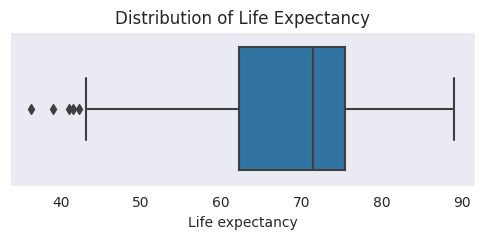

In [27]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Life expectancy'])
plt.title('Distribution of Life Expectancy')
plt.show()

The average life expectancy is around 70 years.

The maximun life expectancy is 89 years. 

There are some outliers where life expectancy is below 40 years. 

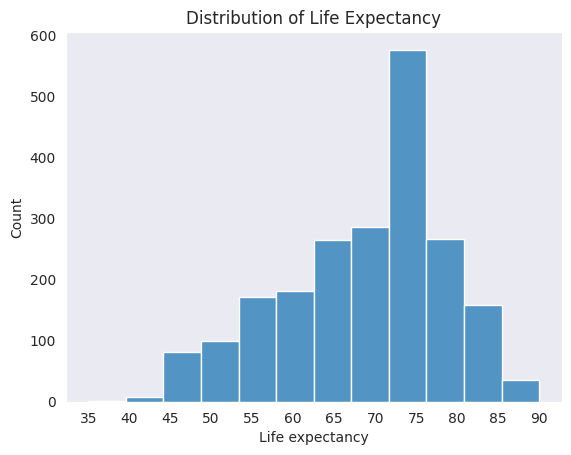

In [28]:
sns.histplot(df['Life expectancy'], binrange=(35,90), bins=12)
plt.title('Distribution of Life Expectancy')
plt.xticks(list(range(35,95,5)))
plt.show()

In [29]:
df['Adult Mortality'].describe()

count    2129.000000
mean      169.735087
std       130.080597
min         1.000000
25%        71.000000
50%       146.000000
75%       236.000000
max       723.000000
Name: Adult Mortality, dtype: float64

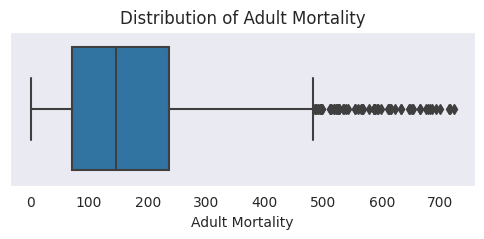

In [30]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Adult Mortality'])
plt.title('Distribution of Adult Mortality')
plt.show()

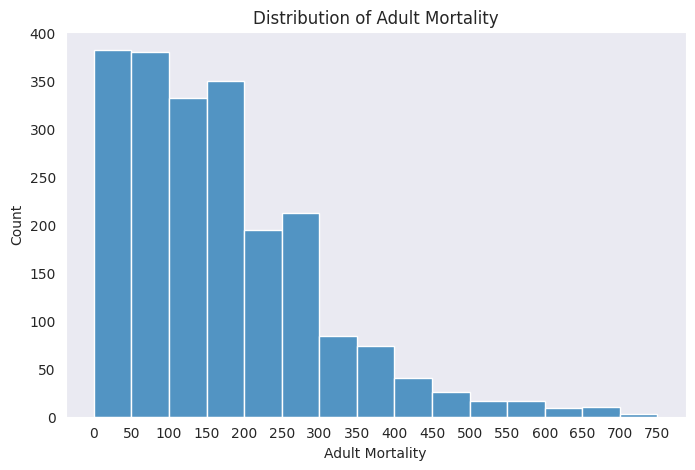

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['Adult Mortality'], binrange=(0,750), bins=15)
plt.title('Distribution of Adult Mortality')
plt.xticks(list(range(0,800,50)))
plt.show()

In [32]:
df['Income composition of resources'].describe()

count    2129.000000
mean        0.617993
std         0.209787
min         0.000000
25%         0.478000
50%         0.662000
75%         0.765000
max         0.948000
Name: Income composition of resources, dtype: float64

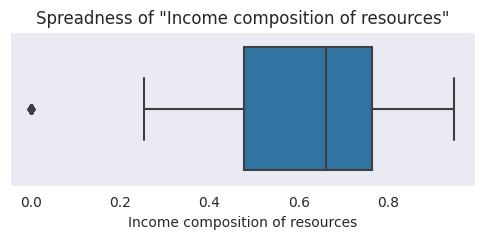

In [33]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Income composition of resources'])
plt.title('Spreadness of "Income composition of resources"')
plt.show()

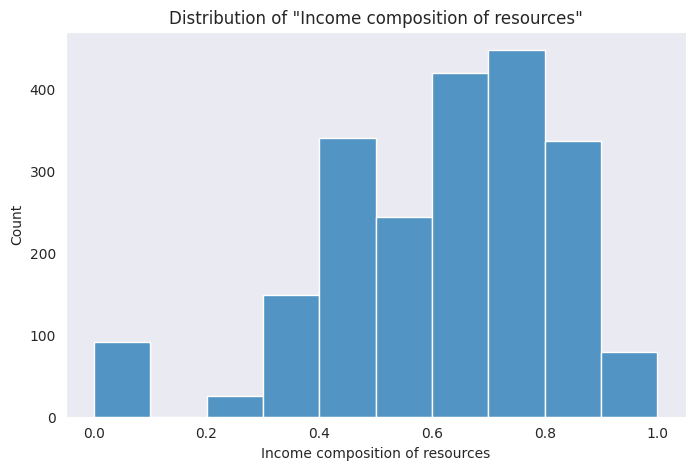

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income composition of resources'], binrange=(0,1), bins=10)
plt.title('Distribution of "Income composition of resources"')
plt.show()


In [35]:
df['Schooling'].describe()

count    2129.000000
mean       11.876092
std         3.347371
min         0.000000
25%         9.800000
50%        12.100000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

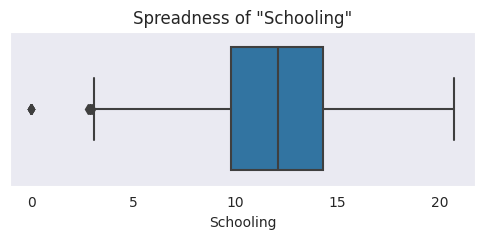

In [36]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['Schooling'])
plt.title('Spreadness of "Schooling"')
plt.show()

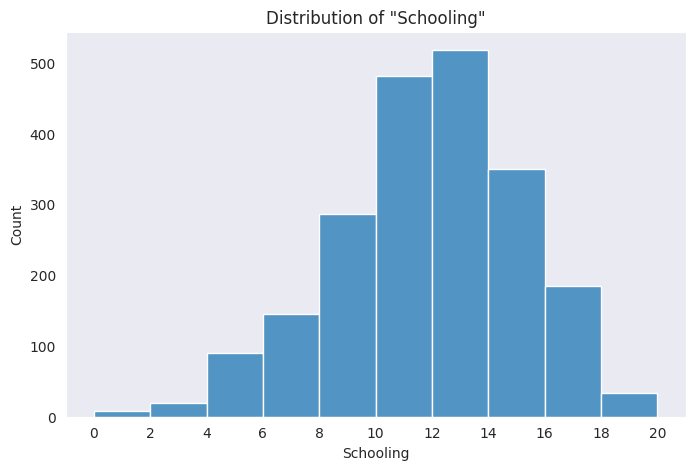

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Schooling'], binrange=(0,20), bins=10)
plt.title('Distribution of "Schooling"')
plt.xticks(list(range(0,22,2)))
plt.show()

## Scatter plots

In [38]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [39]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

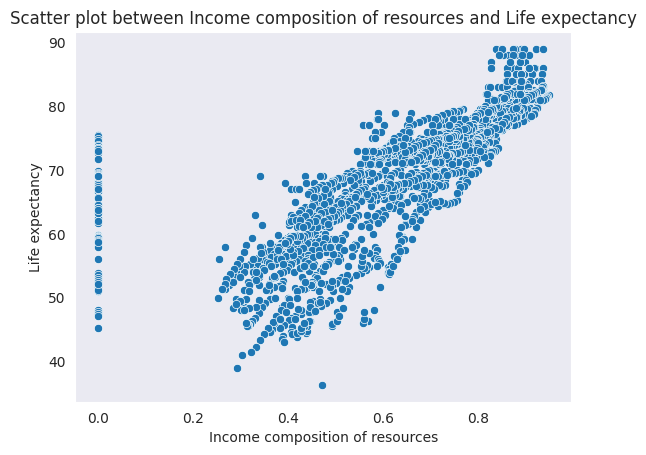

In [40]:
sns.scatterplot(x=df['Income composition of resources'], y=df['Life expectancy'])
plt.title('Scatter plot between Income composition of resources and Life expectancy')
plt.show()

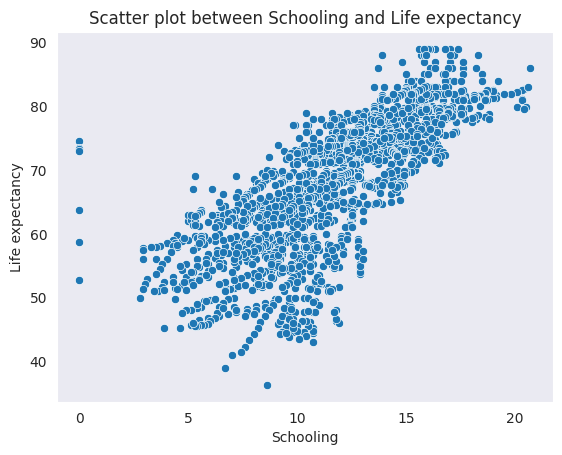

In [41]:
sns.scatterplot(x=df['Schooling'], y=df['Life expectancy'])
plt.title('Scatter plot between Schooling and Life expectancy')
plt.show()

## Isolate categorical variables

In [42]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [43]:
cat_remove_list = ['Country', 'Year', 'Status']
df_update = df.drop(cat_remove_list, axis=1)

## Correlation

In [44]:
df_update.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.672555,-0.171809,0.429497,0.428769,0.158069,-0.140336,0.593071,-0.197561,0.434325,0.232358,0.456059,-0.569305,0.466209,-0.022514,-0.484514,-0.477485,0.750563,0.764083
Adult Mortality,-0.672555,1.000000,0.049739,-0.215930,-0.262226,-0.086891,-0.001149,-0.378940,0.064348,-0.225870,-0.124106,-0.226444,0.536646,-0.283056,-0.013754,0.302781,0.309019,-0.441800,-0.436534
infant deaths,-0.171809,0.049739,1.000000,-0.116277,-0.092934,-0.182530,0.508610,-0.230081,0.996736,-0.160890,-0.149772,-0.163684,0.006788,-0.103355,0.563706,0.483065,0.488858,-0.150230,-0.204744
Alcohol,0.429497,-0.215930,-0.116277,1.000000,0.413648,0.099543,-0.038035,0.394665,-0.112373,0.257588,0.258003,0.263092,-0.052193,0.454601,-0.035376,-0.423221,-0.412901,0.562476,0.615133
percentage expenditure,0.428769,-0.262226,-0.092934,0.413648,1.000000,0.013028,-0.063725,0.273885,-0.095609,0.169427,0.239271,0.170568,-0.115645,0.957694,-0.027173,-0.282659,-0.284522,0.426589,0.439424
Hepatitis B,0.158069,-0.086891,-0.182530,0.099543,0.013028,1.000000,-0.092776,0.124835,-0.187805,0.388120,0.102079,0.468186,-0.084418,0.032149,-0.126404,-0.111951,-0.114093,0.143431,0.162230
Measles,-0.140336,-0.001149,0.508610,-0.038035,-0.063725,-0.092776,1.000000,-0.173440,0.517952,-0.118331,-0.110728,-0.122775,0.022535,-0.070748,0.269529,0.229332,0.224647,-0.141156,-0.149827
BMI,0.593071,-0.378940,-0.230081,0.394665,0.273885,0.124835,-0.173440,1.000000,-0.240285,0.278502,0.241224,0.278045,-0.244333,0.305292,-0.075231,-0.562602,-0.569110,0.542158,0.580429
under-five deaths,-0.197561,0.064348,0.996736,-0.112373,-0.095609,-0.187805,0.517952,-0.240285,1.000000,-0.178802,-0.150442,-0.184452,0.018389,-0.106948,0.549699,0.485551,0.490165,-0.169680,-0.221263
Polio,0.434325,-0.225870,-0.160890,0.257588,0.169427,0.388120,-0.118331,0.278502,-0.178802,1.000000,0.177831,0.679217,-0.142700,0.197263,-0.033975,-0.226574,-0.227800,0.394657,0.426005


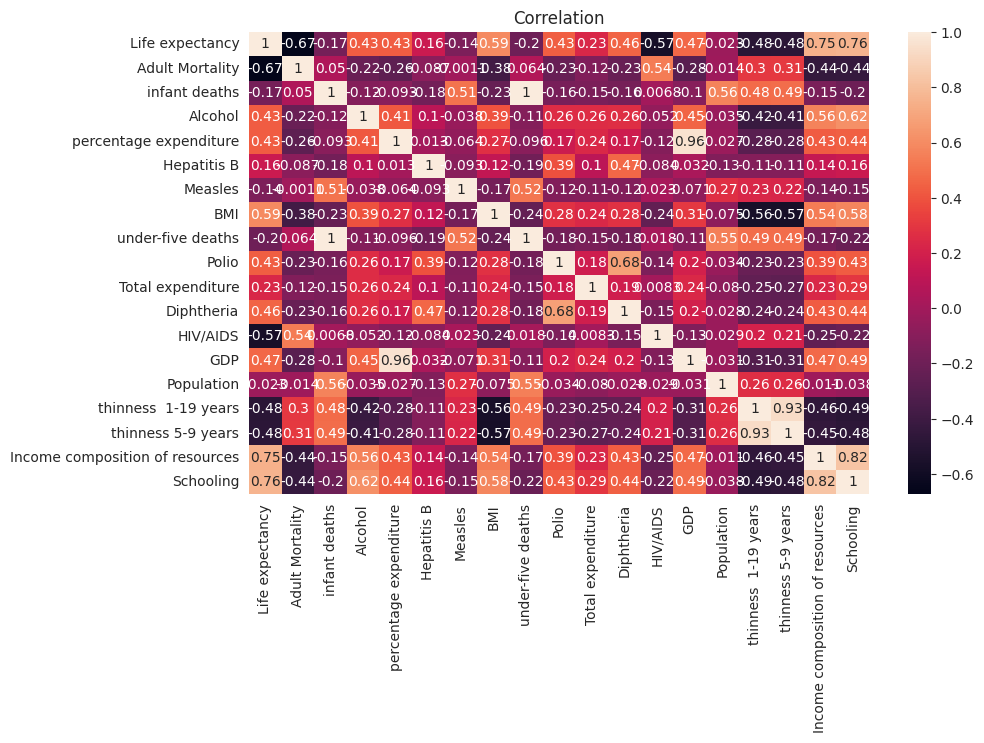

In [45]:
# Create correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_update.corr(), annot=True)
plt.title('Correlation')
plt.show()

# Select Good Features For The Model

In [46]:
variable_list = ['Schooling', 'Income composition of resources', 'GDP', 'Diphtheria', 
                'Polio', 'BMI', 'percentage expenditure', 'Alcohol', 'Life expectancy']
df_last = df_update[variable_list]
df_last.head()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Life expectancy
0,10.1,0.479,584.259210,65.0,6.0,19.1,71.279624,0.01,65.0
1,10.0,0.476,612.696514,62.0,58.0,18.6,73.523582,0.01,59.9
2,9.9,0.470,631.744976,64.0,62.0,18.1,73.219243,0.01,59.9
3,9.8,0.463,669.959000,67.0,67.0,17.6,78.184215,0.01,59.5
4,9.5,0.454,63.537231,68.0,68.0,17.2,7.097109,0.01,59.2


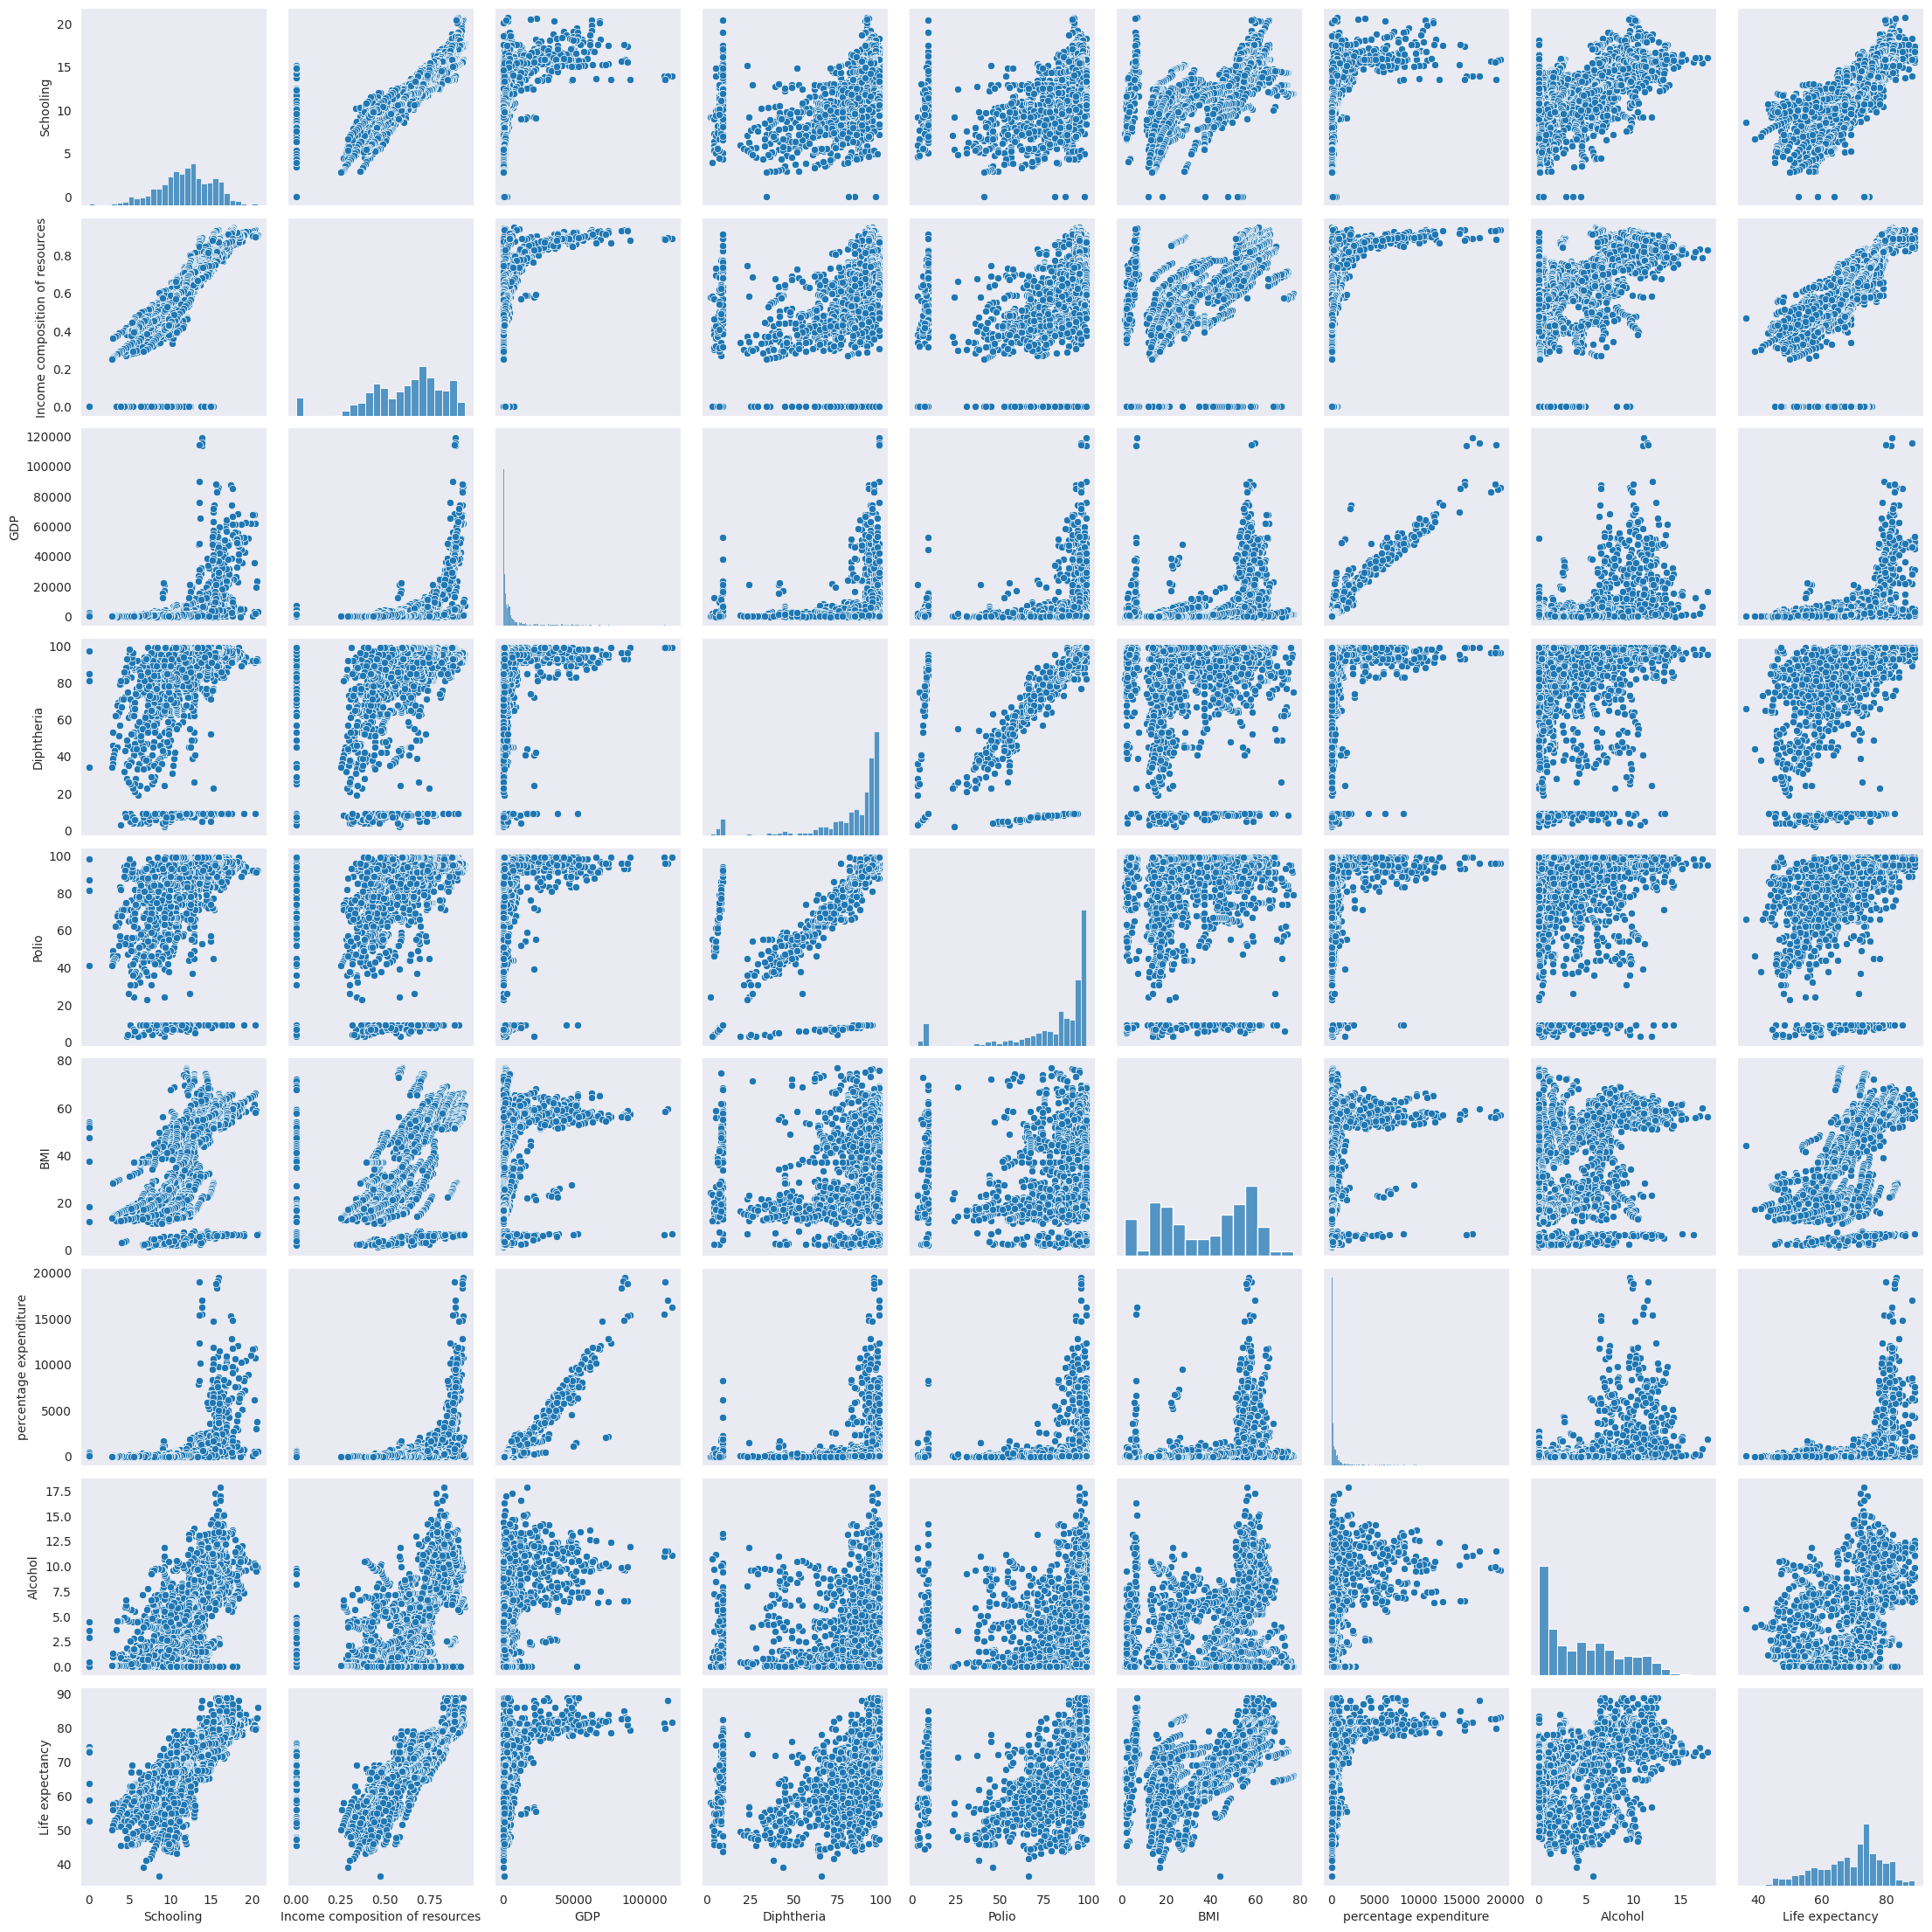

In [47]:
sns.pairplot(df_last);

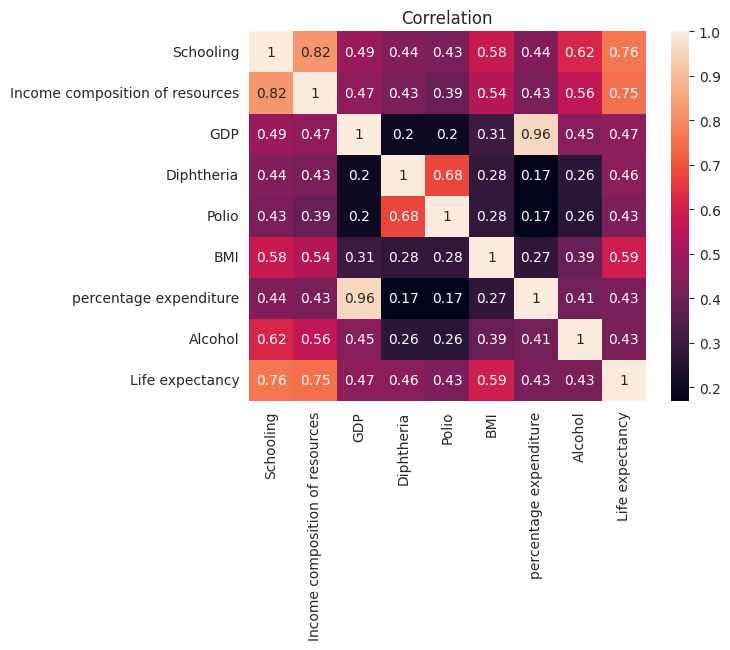

In [48]:
sns.heatmap(df_last.corr(), annot=True)
plt.title('Correlation')
plt.show()

# Model Contruction

In [49]:
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Split data into outcome variable and features

In [50]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, 0 to 2937
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Schooling                        2129 non-null   float64
 1   Income composition of resources  2129 non-null   float64
 2   GDP                              2129 non-null   float64
 3   Diphtheria                       2129 non-null   float64
 4   Polio                            2129 non-null   float64
 5   BMI                              2129 non-null   float64
 6   percentage expenditure           2129 non-null   float64
 7   Alcohol                          2129 non-null   float64
 8   Life expectancy                  2129 non-null   float64
dtypes: float64(9)
memory usage: 166.3 KB


In [51]:
## Adding categorical variables
df_last = df_last.join(df[cat_remove_list])
df_last.head()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Life expectancy,Country,Year,Status
0,10.1,0.479,584.259210,65.0,6.0,19.1,71.279624,0.01,65.0,Afghanistan,2015,Developing
1,10.0,0.476,612.696514,62.0,58.0,18.6,73.523582,0.01,59.9,Afghanistan,2014,Developing
2,9.9,0.470,631.744976,64.0,62.0,18.1,73.219243,0.01,59.9,Afghanistan,2013,Developing
3,9.8,0.463,669.959000,67.0,67.0,17.6,78.184215,0.01,59.5,Afghanistan,2012,Developing
4,9.5,0.454,63.537231,68.0,68.0,17.2,7.097109,0.01,59.2,Afghanistan,2011,Developing


In [52]:
X = df_last.drop('Life expectancy', axis=1)
y = df_last['Life expectancy']

X.head()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Country,Year,Status
0,10.1,0.479,584.259210,65.0,6.0,19.1,71.279624,0.01,Afghanistan,2015,Developing
1,10.0,0.476,612.696514,62.0,58.0,18.6,73.523582,0.01,Afghanistan,2014,Developing
2,9.9,0.470,631.744976,64.0,62.0,18.1,73.219243,0.01,Afghanistan,2013,Developing
3,9.8,0.463,669.959000,67.0,67.0,17.6,78.184215,0.01,Afghanistan,2012,Developing
4,9.5,0.454,63.537231,68.0,68.0,17.2,7.097109,0.01,Afghanistan,2011,Developing


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, 0 to 2937
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Schooling                        2129 non-null   float64
 1   Income composition of resources  2129 non-null   float64
 2   GDP                              2129 non-null   float64
 3   Diphtheria                       2129 non-null   float64
 4   Polio                            2129 non-null   float64
 5   BMI                              2129 non-null   float64
 6   percentage expenditure           2129 non-null   float64
 7   Alcohol                          2129 non-null   float64
 8   Country                          2129 non-null   object 
 9   Year                             2129 non-null   int64  
 10  Status                           2129 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 264.1+ KB


In [54]:
# change year data type from integer to string
X['Year'] = X['Year'].astype('str')

X = pd.get_dummies(X, drop_first=True)
X.head()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Country_Albania,Country_Algeria,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,10.1,0.479,584.259210,65.0,6.0,19.1,71.279624,0.01,False,False,...,False,False,False,False,False,False,False,False,True,True
1,10.0,0.476,612.696514,62.0,58.0,18.6,73.523582,0.01,False,False,...,False,False,False,False,False,False,False,True,False,True
2,9.9,0.470,631.744976,64.0,62.0,18.1,73.219243,0.01,False,False,...,False,False,False,False,False,False,True,False,False,True
3,9.8,0.463,669.959000,67.0,67.0,17.6,78.184215,0.01,False,False,...,False,False,False,False,False,True,False,False,False,True
4,9.5,0.454,63.537231,68.0,68.0,17.2,7.097109,0.01,False,False,...,False,False,False,False,True,False,False,False,False,True


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.53071777 -0.66269761 -0.44209277 ... -0.26631852 26.62079388
   0.47431132]
 [-0.56059898 -0.67700116 -0.44001983 ...  3.75490223 -0.03756462
   0.47431132]
 [-0.59048019 -0.70560826 -0.43863129 ... -0.26631852 -0.03756462
   0.47431132]
 ...
 [-0.56059898 -0.91062583 -0.48050205 ... -0.26631852 -0.03756462
   0.47431132]
 [-0.62036139 -0.91062583 -0.44469308 ... -0.26631852 -0.03756462
   0.47431132]
 [-0.62036139 -0.87725088 -0.44478263 ... -0.26631852 -0.03756462
   0.47431132]]


In [56]:
# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

#### Train data

In [58]:
# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.960641535409428


In [59]:
y_pred = LR.predict(X_train)

In [60]:
print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

R^2:  0.960641535409428
MAE:  1.251530778909592
MSE:  3.844088452385406
RMSE:  1.9606347065135326


#### Test data

In [61]:
# Evaluate the model performance on the testing data
print('Coefficient of determination: ', LR.score(X_test, y_test))

Coefficient of determination:  0.9388981795130131


In [62]:
y_pred_test = LR.predict(X_test)

In [63]:
print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2:  0.9388981795130131
MAE:  1.509491500734023
MSE:  5.766446457356984
RMSE:  2.4013426363926045


## Execute Results

In [64]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test, 
              'predicted': y_pred_test.ravel(), 
              'residual': y_test - y_pred_test})
results.head()

,actual,predicted,residual
395,72.2,71.257637,0.942363
2692,72.0,72.678364,-0.678364
2299,54.0,48.663716,5.336284
1698,74.8,73.193013,1.606987
2712,63.8,60.191548,3.608452


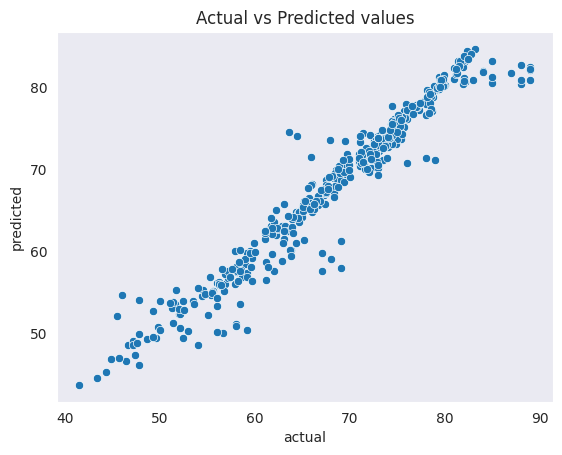

In [65]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], 
                y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

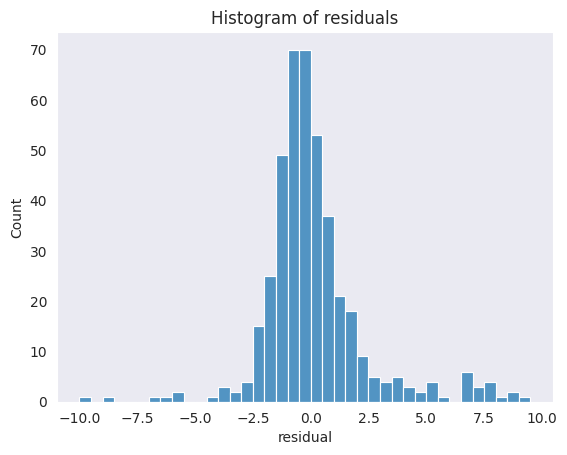

In [66]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-10,10,0.5))
plt.title('Histogram of residuals')
plt.show()

In [67]:
# Calculate residual mean
results['residual'].mean()

0.13489346653798764

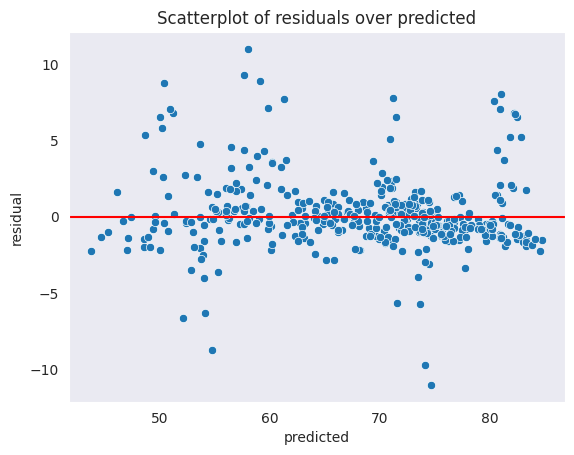

In [68]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

In [69]:
# Output the model's coefficients
coefficients = pd.DataFrame(LR.coef_, index=X.columns).T
coefficients

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Country_Albania,Country_Algeria,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,0.552093,0.013602,-0.212907,0.172219,0.033296,-0.086191,0.141008,-0.708378,1.465521,1.228336,...,0.591553,0.674255,0.79303,0.810791,0.981201,0.968384,1.068909,1.091827,0.202271,-6.450977e+12


## Conclusion

The results of the model are promising. 
* The graph between actual vs predicted values show strong linear relationship.
* The residuals are normally distributed.
* This model has good coefficient of determination (R^2: 0.960) on training data. 
* The model has performed well on testing data with coefficient of determination (R^2:  0.938)